# Risk Classification of Cardiovascular Disease Using Decision Tree, Random Forest, and XGBoost

## 1) Introduction:

#### Datatset
- This dataset was obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Context:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains **11 features** that can be used to **predict a possible heart disease.**

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management. 

#### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]



## 1.1) Objective of this Project:
Build a Machine Learning Model that can preedict if a patient has high probability of having a Cardiovascular Disease based on the features analized.

## 2) Data Analysis and Feature Encoding:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/ramon/Proyectos Data Science/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


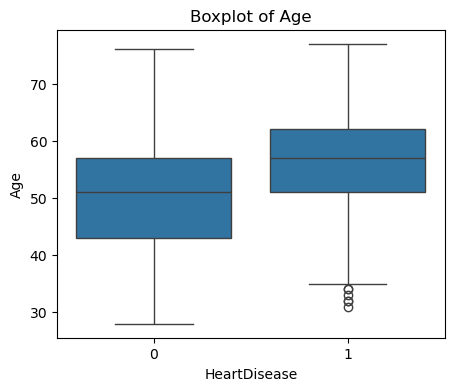

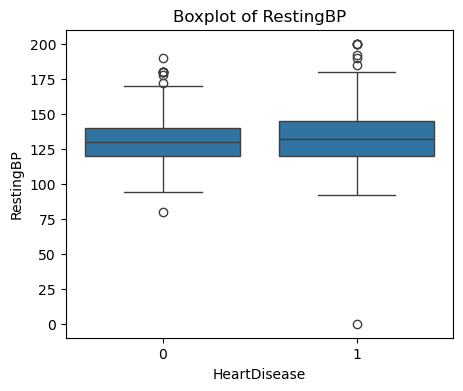

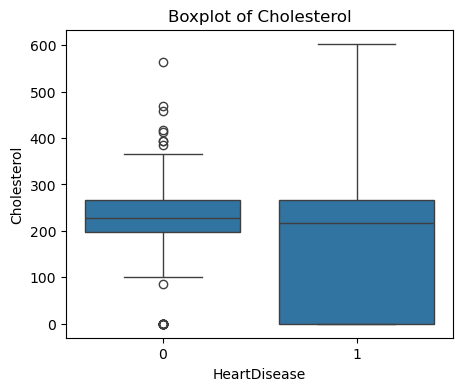

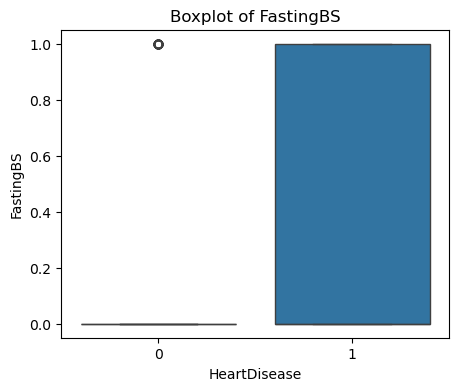

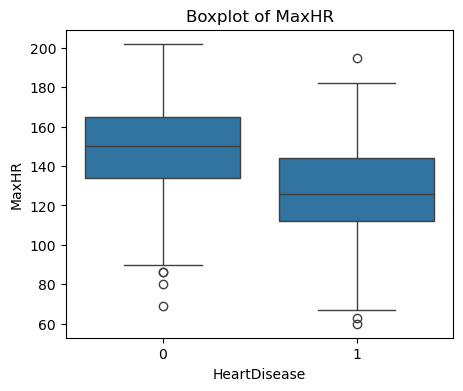

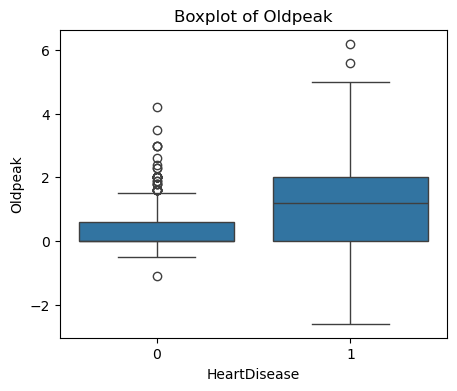

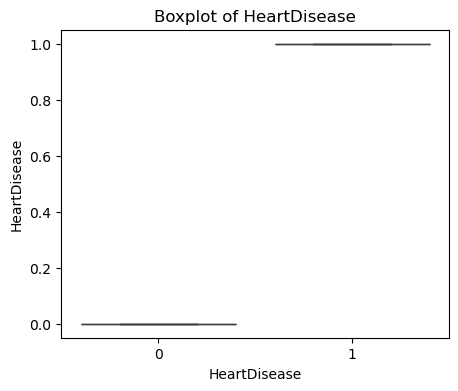

In [44]:
column_names = df.select_dtypes(include = "number").columns

for col in column_names:
    plt.figure(figsize = (5,4))
    sns.boxplot(data = df, x = "HeartDisease", y = col)
    plt.title(f"Boxplot of {col}")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


So we have some features that are objects. These algorithms need nummerical data, so one-hot encoding will be necessary. 

### Feature One-Hot Encoding:

In [5]:
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

df = pd.get_dummies(data = df,
                   prefix = categorical_features, 
                   columns = categorical_features)

df.head()

# columns: specifies the columns will be feature encoded
# prefix: includes a prefix to the name of column for better identification.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [6]:
# Now I am going to include the names of the features in a list:

features = [x for x in df.columns if x not in "HeartDisease"]
features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [7]:
print(len(features))

20


## 3) Splitting the Data:

I will split the data into a Train Set and a Test Set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
RANDOM_STATE = 55

In [10]:
X_train, x_val, y_train, y_val = train_test_split(df[features], df["HeartDisease"], train_size = 0.8, random_state = RANDOM_STATE)

In [11]:
print(f" Train examples: {len(X_train)}")
print(f" Validation examples: {len(y_val)}")
print(f" Target Proportion: {sum(y_train)/len(y_train):.4f}")

 Train examples: 734
 Validation examples: 184
 Target Proportion: 0.5518


The 55% of the train examples are of HeartDisease patients

## 4) Building the Models:

I wiil build three algorithms and finally evaluate with the validation : 
1) A Decision Tree
2) A Random forest
3) XGBoost

### 4.1) Decision Tree:

Decision Tree is an algorithm that can be used either for classification or regression depending on the target  type. The objective of the algorithm is to find a tree that predicts the target variable, which is characterized by some features, with the smallest error. 

The algorithm has to find a feature which maximices the purity of the classification on a given node, where purity is the proportion of targets in a given group. To measure purity, we can define the **Entropy Function**:

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

where $p_1$ is the proportion of targets in thhe group. This function has a max value of 1 when $p_1 = 0.5$, and as $p_1$ tends either to one or to zero, the entropy decreases, meaning that the group is getting enriched in either target or the other target value. So the Entropy Function is a way to quantify purity of a node split. To choose which feature to use for a given node, the **Information Gain Function** is defined:

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

where $p_1^\text{node}$ is the entropy of the node, $p_1^\text{left}$ is the proportion of the targets in the left group, $p_1^\text{rigth}$ the proportion of the targets in the right group, $w^\text{left}$ the proportion of examples in left group and $w^\text{right}$ the proportion of examples in the right group. This function quantifies the reduction in entropy due to a given split (i.e. we choose feature A and when we do the classification with each example we obtain certain Information Gain. The feature with the highest information gain wins).

The Decision Tree algorithm does as follows:
1. Starts with all the examples at the root node.
2. Calculate the information gain for all possible features, and pick the one with the highest information gain.
3. Split the dataset according to the selected feature and create a left and right branches of the tree.
4. Keep repeating this process until the stoppinng criteria is met, which could be:
- Node is 100% one class.
- More splits result in > max depth.
- Information gain from additional splits is less than treshold.
- Number of examples in a node is < threshold.


#### Decision Tree Hyperparameters:

The hyperparameters I will use and investigate here are:

 - min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

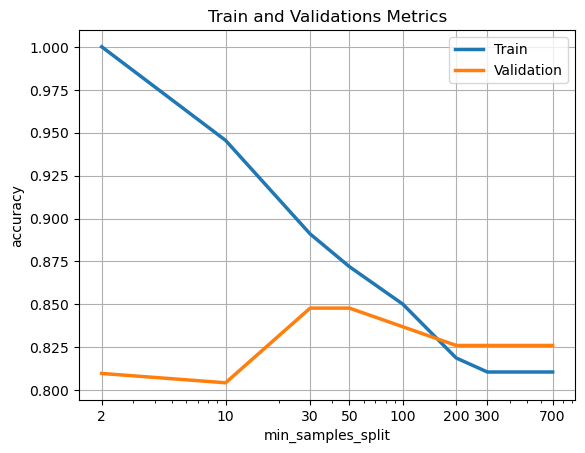

In [54]:
# I will evaluate several min_samples_split:

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

# For accuracy storage after each round:
accuracy_train_list = []
accuracy_val_list = []


for min_sample_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_sample_split,
                                  random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    # Predictions in Train and Validation Sets:
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(x_val) 

    # Accuracy in Train and Validation Predictions:
    accuracy_train = accuracy_score(predictions_train, y_train) 
    accuracy_val = accuracy_score(predictions_val, y_val)
    
    # Store the results:
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)


# So the for loop will build for each round a Decision Tree with a particular value of min_samples_split.

plt.title("Train and Validations Metrics")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.xscale('log') # For x log scale.
plt.xticks(ticks=min_samples_split_list, labels=min_samples_split_list)
plt.plot(min_samples_split_list, accuracy_train_list, label = "Train", linewidth=2.5)
plt.plot(min_samples_split_list, accuracy_val_list, label = "Validation", linewidth=2.5)
plt.legend()
plt.grid()



Train: As the min_samples_split increases, the accuracy decreases. Showing that if we increase the minimum number of samples needed for further splits, the decision trees are less accurate as they become less complex. 

Validation: Accuracy is low for small values of min_samples_split, but it improves significantly between 10 and 30. It reaches its maximum and stabilizes between 30 and 50. In this range, the gap between training and validation accuracy decreases, indicating reduced overfitting and better generalization.

**Conclusion: The optimal** `min_samples_split` **is 50.**

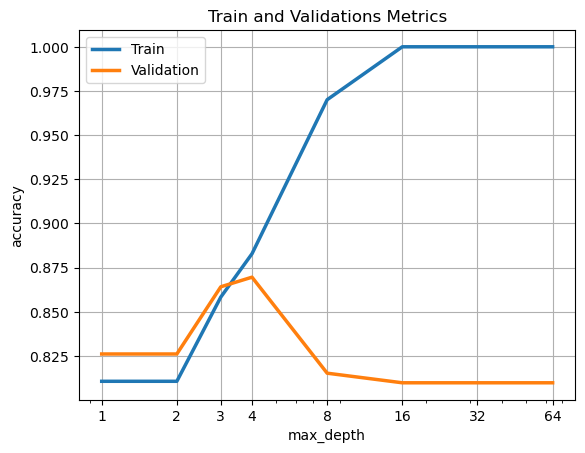

In [55]:
# Now, I will evaluate several max_depth_list:

max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64]

# For accuracy storage after each round:
accuracy_train_list = []
accuracy_val_list = []


for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth,
                                  random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    # Predictions in Train and Validation Sets:
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(x_val) 

    # Accuracy in Train and Validation Predictions:
    accuracy_train = accuracy_score(predictions_train, y_train) 
    accuracy_val = accuracy_score(predictions_val, y_val)
    
    # Store the results:
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)


# So the for loop will build for each round a Decision Tree with a particular value of min_samples_split.

plt.title("Train and Validations Metrics")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.xscale('log') # For x log scale.
plt.xticks(ticks=max_depth_list, labels=max_depth_list)
plt.plot(max_depth_list, accuracy_train_list, label = "Train", linewidth=2.5)
plt.plot(max_depth_list, accuracy_val_list, label = "Validation", linewidth=2.5)
plt.legend()
plt.grid()


For max_depth =< 4, both Train and Validation Accuracy increase as max_depth increases. This makes sense as the tree gains more nodes to which classify each example as positive or negative. 

However for max_depth > 4, Train Accuracy increases and Validation Accuracy decreases showing clear evidences of overfitting. The decision tree becomes more accurate in the train data but less accurate with the validation, the generalization of the model decreases.

**Conclusion: The optimal** `max_depth` **is 4.**

#### Decision Tree Model:

In [56]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                            max_depth = 4,
                                            random_state = RANDOM_STATE,
                                            )

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=55)

In [57]:
# Now I will check the Accuracy:


print(f"Accuracy - Train Set: {accuracy_score(decision_tree_model.predict(X_train), y_train):.4f}")
print(f"Accuracy - Validation Set: {accuracy_score(decision_tree_model.predict(x_val), y_val):.4f}")

Accuracy - Train Set: 0.8665
Accuracy - Validation Set: 0.8696


There is no sign of overfitting. Let's see if we can improve Accuracy with a Trees Ensemble:

### 4.2) Random Forest:

Decision Trees can be sensible to small changes in training data. To create a more robust model, we can create a Tree Ensemble, which consist of multiple decision trees. Random Forest is a Trees Ensemble algorithm.

Random Forest randomly chooses a subset of the features AND randomly chooses a subset of the training examples to train each individual tree. This randomness introduces diversity among the trees, which helps reduce overfitting and improves generalization. Additionally, each tree is trained on a random subset of the training data using bootstrap sampling (sampling with replacement).

If $n$ is the number of features, the algorithm randomly selects $\sqrt{n}$ of these features to train each indivvidual tree. So, to further optimize the algorithm, I am introducing a third hyperparameter which is `n_estimators`. This is the number of Decision Trees that make the Random Forest. Increasing the number of trees generally improves the model's performance, but it also increases computational cost. 

In [13]:
from sklearn.ensemble import RandomForestClassifier

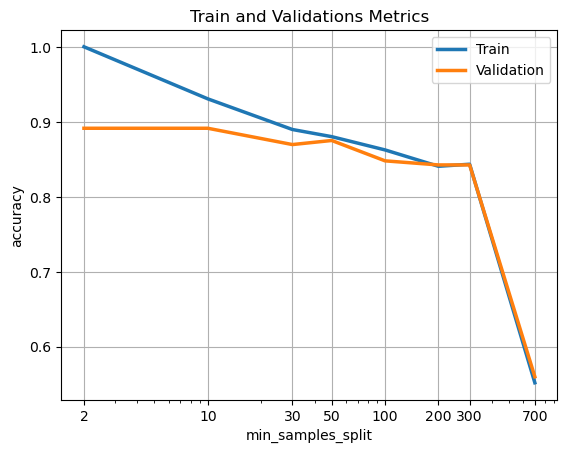

In [14]:
# I will evaluate several min_samples_split:

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

# For accuracy storage after each round:
accuracy_train_list = []
accuracy_val_list = []


for min_sample_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_sample_split,
                                  random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    # Predictions in Train and Validation Sets:
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(x_val) 

    # Accuracy in Train and Validation Predictions:
    accuracy_train = accuracy_score(predictions_train, y_train) 
    accuracy_val = accuracy_score(predictions_val, y_val)
    
    # Store the results:
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)


# So the for loop will build for each round a Decision Tree with a particular value of min_samples_split.

plt.title("Train and Validations Metrics")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.xscale('log') # For x log scale.
plt.xticks(ticks=min_samples_split_list, labels=min_samples_split_list)
plt.plot(min_samples_split_list, accuracy_train_list, label = "Train", linewidth=2.5)
plt.plot(min_samples_split_list, accuracy_val_list, label = "Validation", linewidth=2.5)
plt.legend()
plt.grid()


The `min_samples_split`  at which we observe the highest Validation accuracy and the smallest difference with the Train Validation is at `min_samples_split = 10`


Now let´s evaluate `max_depth`:

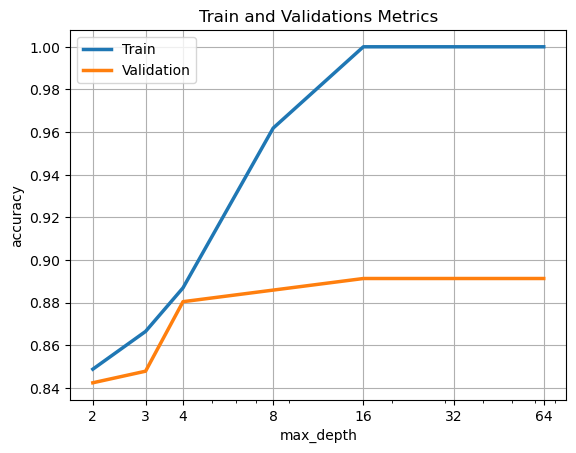

In [15]:
# Now, I will evaluate several max_depth_list:

max_depth_list = [2, 3, 4, 8, 16, 32, 64]

# For accuracy storage after each round:
accuracy_train_list = []
accuracy_val_list = []


for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth,
                                  random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    # Predictions in Train and Validation Sets:
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(x_val) 

    # Accuracy in Train and Validation Predictions:
    accuracy_train = accuracy_score(predictions_train, y_train) 
    accuracy_val = accuracy_score(predictions_val, y_val)
    
    # Store the results:
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)


# So the for loop will build for each round a Decision Tree with a particular value of min_samples_split.

plt.title("Train and Validations Metrics")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.xscale('log') # For x log scale.
plt.xticks(ticks=max_depth_list, labels=max_depth_list)
plt.plot(max_depth_list, accuracy_train_list, label = "Train", linewidth=2.5)
plt.plot(max_depth_list, accuracy_val_list, label = "Validation", linewidth=2.5)
plt.legend()
plt.grid()


I think we could use `max_depth = 16`, checking with the rest of the hyperparameters in the final model.

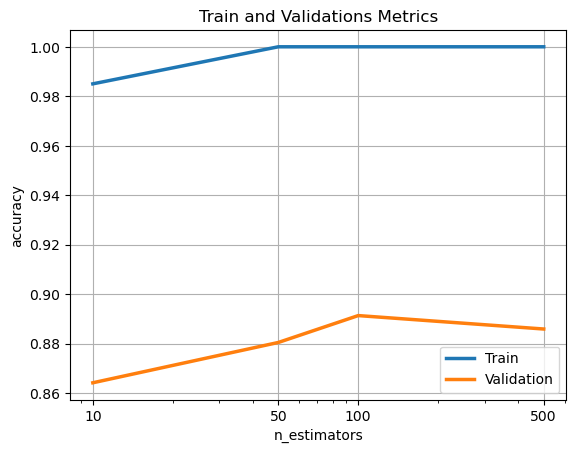

In [16]:
# Now, I will evaluate several max_depth_list:

n_estimators_list = [10, 50, 100, 500]

# For accuracy storage after each round:
accuracy_train_list = []
accuracy_val_list = []


for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,
                                  random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    # Predictions in Train and Validation Sets:
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(x_val) 

    # Accuracy in Train and Validation Predictions:
    accuracy_train = accuracy_score(predictions_train, y_train) 
    accuracy_val = accuracy_score(predictions_val, y_val)
    
    # Store the results:
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)


# So the for loop will build for each round a Decision Tree with a particular value of min_samples_split.

plt.title("Train and Validations Metrics")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xscale('log') # For x log scale.
plt.xticks(ticks=n_estimators_list, labels=n_estimators_list)
plt.plot(n_estimators_list, accuracy_train_list, label = "Train", linewidth=2.5)
plt.plot(n_estimators_list, accuracy_val_list, label = "Validation", linewidth=2.5)
plt.legend()
plt.grid()


So, I will build a Random Forest Algorithm with the followwing hyperparameters:

- `min_samples_split = 10`
- `max_depth = 16`
- `n_estimators = 100`

In [17]:
random_forest_model = RandomForestClassifier(min_samples_split = 10,
                                            max_depth = 16,
                                            n_estimators = 100)

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=10)

In [18]:

print(f"Accuray - Train Set: {accuracy_score(random_forest_model.predict(X_train), y_train):.4f}")
print(f"Accuracy - Validation Set: {accuracy_score(random_forest_model.predict(x_val), y_val):.4f}")


Accuray - Train Set: 0.9346
Accuracy - Validation Set: 0.8913


Changing one hyperparameter at a time ( for eg. 4+4+4 = 12 results), differs from evaluating each combination (3 parameters each with 4 values = 4x4x4 = 64 combinations), I will do a Hyperparameter Optimization with `GridSearchCV`

#### GridSearchCV Hyperparameter Tuning:

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [110]:
# I will define the model:
random_forest = RandomForestClassifier(random_state = RANDOM_STATE)

# Define Hyperparameters:
param_grid = {
"n_estimators": [10, 50, 100, 500],
"max_depth": [2, 3, 4, 8, 16, 32, 64],
"min_samples_split": [2,10, 30, 50, 100, 200, 300, 700]
}

grid_search = GridSearchCV(
    estimator = random_forest,
    param_grid = param_grid,
    cv = 5, # Cross Validation with 5 parrtitions
    scoring = "accuracy",  # Evaluation Metric
    n_jobs = 2,    # Conservative use of processing
    verbose = 0     # show progress
    
)

# Fit the model:
grid_search.fit(X_train, y_train)


# Results of the best model:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# The best model is:
best_random_forest = grid_search.best_estimator_

# Evaluate the best model with the validation set: 
y_pred = best_random_forest.predict(x_val)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Best Parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.8718572360451031

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        81
           1       0.89      0.89      0.89       103

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



The acccuracy of the validation set obatined here is also 0.88, suggesting that the previus optimization was correct and that this is likely the performance limit of this model with the current data.

### 4.3) XGBoost:

Gradient Boosting is another tree ensemble algorithm. In contrast to Random Forest, where decision trees are built independently and in parallel, Gradient Boosting builds trees sequentially. Each tree is trained to correct the errors of the previous one, optimizing the model step by step.

The model has the same parameters as a decision tree, plus the learning rate.
- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

One interesting thing about XGBoost is that during fitting, it can take an **evaluation dataset**. On each iteration, it measures the cost on the evaluation dataset. Once the cost stops decreasing, the training will stop. More iterations lead to more trees, and more trees can result in overfitting. By stopping once the validation metric no longer improves, we can limit the number of trees created, and reduce overfitting.

First, I will deefine a subset of the **train** dataset:

In [116]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [16]:
n = int(len(X_train)*0.8)
n

# I will use the 80% of the train data to train the model, the 20% to evaluate the model in each round.

587

In [17]:
# So I will selectt the first n examples for the X_train_fit and the from n onwards as the X_train_eval

X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [69]:

# Now I define the model:
xgb_model = XGBClassifier(n_estimators=500, 
                          learning_rate = 0.1, 
                          early_stopping_rounds=10, 
                          eval_metric="logloss", 
                          random_state = RANDOM_STATE)
# Train the model:
xgb_model.fit(X_train_fit, 
              y_train_fit, 
              eval_set=[(X_train_eval, y_train_eval)], 
              verbose=True)



[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554
[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000
[11]	validation_0-logloss:0.45621
[12]	validation_0-logloss:0.45483
[13]	validation_0-logloss:0.44975
[14]	validation_0-logloss:0.44495
[15]	validation_0-logloss:0.44073
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43936
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44322
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=55, ...)

In [70]:
xgb_model.best_iteration

17

The best round of training was round 17, with a log loss of 0.43936.

(As `early_stopping_rounds`was set to 10, after the 10th round where the log loss doesn't improve, training stops.)

In [67]:
print(f"XGBoost: Accuray - Train Set: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}")
print(f"XGBoost: Accuray - Validation Set: {accuracy_score(xgb_model.predict(x_val),y_val):.4f}")

XGBoost: Accuray - Train Set: 0.9319
XGBoost: Accuray - Validation Set: 0.8533


### Model Results:

In [19]:
# Decision Tree:

print(f"Decision Tree: Accuracy - Train Set: {accuracy_score(decision_tree_model.predict(X_train), y_train):.4f}")
print(f"Decision Tree: Accuracy - Validation Set: {accuracy_score(decision_tree_model.predict(x_val), y_val):.4f}")

# Random Forest:

print(f"Random Forest: Accuray - Train Set: {accuracy_score(random_forest_model.predict(X_train), y_train):.4f}")
print(f"Random Forest: Accuracy - Validation Set: {accuracy_score(random_forest_model.predict(x_val), y_val):.4f}")

# XGBoost:

print(f"XGBoost: Accuray - Train Set: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}")
print(f"XGBoost: Accuray - Validation Set: {accuracy_score(xgb_model.predict(x_val),y_val):.4f}")

NameError: name 'decision_tree_model' is not defined

Overall, the best performance was obtained with the **Random Forest model.** (Validation Accuracy)

## 5) Final Model:

In [20]:
# For example if we want to know if a list of patients has a high prob of havind Cardiovascular Disease:

val_predictions_rf = random_forest_model.predict(x_val)
val_predictions_rf

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1])

In [21]:
round(accuracy_score(y_val, val_predictions_rf),3)

0.891

So, we designed a model that can predict with an accuracy of 89.7% if a patient has high probability of having a Cardiovascular Disease based on the features analized.

We're gonna save the model using joblib

In [22]:
import joblib 

In [23]:
joblib.dump(random_forest_model, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


In [26]:
!which python

/Users/anaconda3/bin/python


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non